In [15]:
import os
import pathlib
import sys

%env PDK_ROOT=/home/monib/OpenLane/pdks
%env PDK=sky130A
%env STD_CELL_LIBRARY=sky130_fd_sc_hd
%env STD_CELL_LIBRARY_OPT=sky130_fd_sc_hd
%env OPENLANE_LOCAL_INSTALL=1

env: PDK_ROOT=/home/monib/OpenLane/pdks
env: PDK=sky130A
env: STD_CELL_LIBRARY=sky130_fd_sc_hd
env: STD_CELL_LIBRARY_OPT=sky130_fd_sc_hd
env: OPENLANE_LOCAL_INSTALL=1


In [16]:
%%writefile inverter.v
module inverter(input wire in, output wire out);
    assign out = !in;
endmodule

Overwriting inverter.v


In [17]:
%%writefile config.tcl
set ::env(DESIGN_NAME) inverter
set ::env(VERILOG_FILES) "inverter.v"
set ::env(CLOCK_TREE_SYNTH) 0
set ::env(CLOCK_PORT) ""
set ::env(PL_RANDOM_GLB_PLACEMENT) 1
set ::env(FP_SIZING) absolute
set ::env(DIE_AREA) "0 0 50 50"
set ::env(PL_TARGET_DENSITY) 0.80
set ::env(FP_PDN_HORIZONTAL_HALO) 6
set ::env(FP_PDN_VERTICAL_HALO) 6
set ::env(DIODE_INSERTION_STRATEGY) 3

# disable version checks because we use conda packaged versions
set ::env(TEST_MISMATCHES) none
# disable klayout because of https://github.com/hdl/conda-eda/issues/175
set ::env(RUN_KLAYOUT) 0
# disable CVC because of https://github.com/hdl/conda-eda/issues/174
set ::env(RUN_CVC) 0

Overwriting config.tcl


In [18]:
!flow.tcl -design .

OpenLane 94521291e39eb5895aceb059b655cd2532d5564b
All rights reserved. (c) 2020-2022 Efabless Corporation and contributors.
Available under the Apache License, version 2.0. See the LICENSE file for more details.

[INFO]: Using configuration in 'config.tcl'...
[INFO]: PDK Root: /home/monib/OpenLane/pdks
[INFO]: Process Design Kit: sky130A
[INFO]: Standard Cell Library: sky130_fd_sc_hd
[INFO]: Optimization Standard Cell Library: sky130_fd_sc_hd
[INFO]: Run Directory: /home/monib/eda-toolchain/sky130inv/runs/RUN_2022.08.22_17.16.06
[INFO]: Preparing LEF files for the nom corner...
[INFO]: Preparing LEF files for the min corner...
[INFO]: Preparing LEF files for the max corner...
[STEP 1]
[INFO]: Running Synthesis (log: runs/RUN_2022.08.22_17.16.06/logs/synthesis/1-synthesis.log)...
[STEP 2]
[INFO]: Running Single-Corner Static Timing Analysis (log: runs/RUN_2022.08.22_17.16.06/logs/synthesis/2-sta.log)...
[STEP 3]
[INFO]: Running Initial Floorplanning (log: runs/RUN_2022.08.22_17.16.06/lo

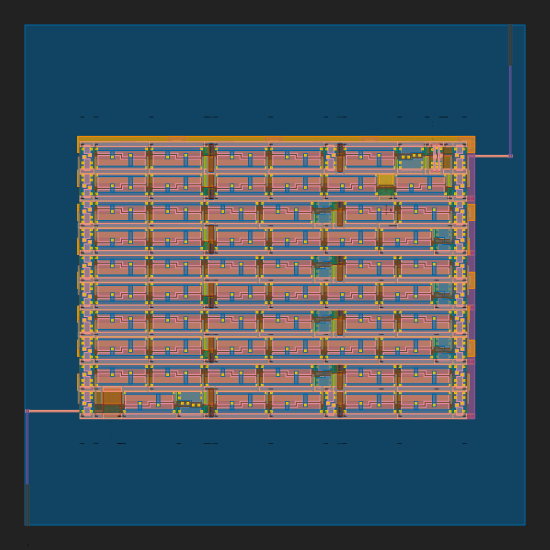

In [19]:
import pathlib
import gdstk
import IPython.display

gdss = sorted(pathlib.Path('runs').glob('*/results/final/gds/*.gds'))
library = gdstk.read_gds(gdss[-1])
top_cells = library.top_level()
top_cells[0].write_svg('inverter.svg')
IPython.display.SVG('inverter.svg')